# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join('Resources', 'city_data.csv')
ride_data_to_load = os.path.join('Resources', 'ride_data.csv')

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
ride_count_by_type = pyber_data_df.groupby('type')['ride_id'].count()

urban_total_rides = ride_count_by_type['Urban']
suburban_total_rides = ride_count_by_type['Suburban']
rural_total_rides = ride_count_by_type['Rural']

In [4]:
# 2. Get the total drivers for each city type
driver_count_by_type = city_data_df.groupby('type')['driver_count'].sum()

urban_total_drivers = driver_count_by_type['Urban']
suburban_total_drivers = driver_count_by_type['Suburban']
rural_total_drivers = driver_count_by_type['Rural']

In [5]:
#  3. Get the total amount of fares for each city type
total_fares_by_type = pyber_data_df.groupby('type')['fare'].sum()

urban_total_fares = total_fares_by_type['Urban']
suburban_total_fares = total_fares_by_type['Suburban']
rural_total_fares = total_fares_by_type['Rural']

In [6]:
#  4. Get the average fare per ride for each city type. 
urban_average_fare_per_ride = urban_total_fares / urban_total_rides
suburban_average_fare_per_ride = suburban_total_fares / suburban_total_rides
rural_average_fare_per_ride = rural_total_fares / rural_total_rides

In [7]:
# 5. Get the average fare per driver for each city type. 
urban_average_fare_per_driver = urban_total_fares / urban_total_drivers
suburban_average_fare_per_driver = suburban_total_fares / suburban_total_drivers
rural_average_fare_per_driver = rural_total_fares / rural_total_drivers

In [35]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    'type' : ['Rural', 'Suburban', 'Urban'],
    'Total Rides' : [rural_total_rides, suburban_total_rides, urban_total_rides],
    'Total Drivers' : [rural_total_drivers, suburban_total_drivers, urban_total_drivers],
    'Total Fares' : [rural_total_fares, suburban_total_fares, urban_total_fares],
    'Average Fare per Ride' : [rural_average_fare_per_ride, suburban_average_fare_per_ride, urban_average_fare_per_ride],
    'Average Fare per Driver' : [rural_average_fare_per_driver, suburban_average_fare_per_driver, urban_average_fare_per_driver]
}).set_index('type')
pyber_summary_df
pyber_summary_df['Total Fares']/17

type
Rural        254.584118
Suburban    1138.607647
Urban       2344.375294
Name: Total Fares, dtype: float64

In [32]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [10]:
#  8. Format the columns.
money_format = '${:,.2f}'.format
integer_format = '{:,}'.format
pyber_summary_df['Total Rides'] = pyber_summary_df['Total Rides'].map(integer_format)
pyber_summary_df['Total Drivers'] = pyber_summary_df['Total Drivers'].map(integer_format)
pyber_summary_df['Total Fares'] = pyber_summary_df['Total Fares'].map(money_format)
pyber_summary_df['Average Fare per Ride'] = pyber_summary_df['Average Fare per Ride'].map(money_format)
pyber_summary_df['Average Fare per Driver'] = pyber_summary_df['Average Fare per Driver'].map(money_format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame
timeseries_df = pyber_data_df.copy()

In [12]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
timeseries_df = timeseries_df.groupby(['type', 'date'])[['fare']].sum()
timeseries_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [13]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
timeseries_df = timeseries_df.reset_index()
timeseries_df


,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [14]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table_df = timeseries_df.pivot(index = 'date', columns = 'type', values = 'fare')
pivot_table_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [15]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
first_third_df = pivot_table_df['2019-01-01':'2019-04-29']
first_third_df


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
first_third_df.index = pd.to_datetime(first_third_df.index)

In [17]:
# 7. Check that the datatype for the index is datetime using df.info()
first_third_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [27]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
first_third_weekly_df = first_third_df.resample('W').sum()
first_third_weekly_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


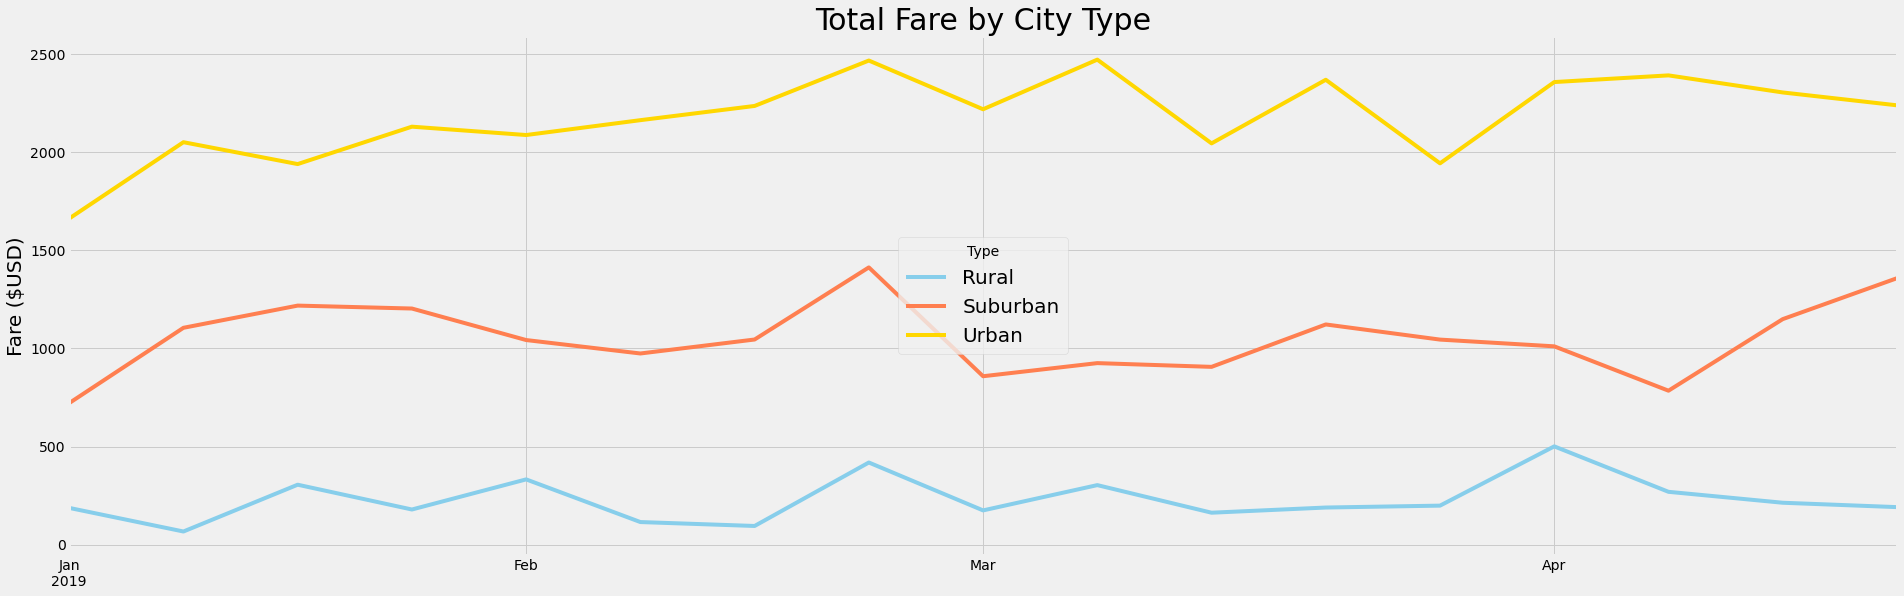

In [25]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function.
# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
timeseries_fig = first_third_weekly_df.plot(color = ['skyblue', 'coral', 'gold'], figsize = (26 + 2/3,8.5)) 
timeseries_fig.set_xlabel(None)
timeseries_fig.set_ylabel('Fare ($USD)', fontsize = 20)
timeseries_fig.legend(loc = 'center', title = 'Type', fontsize = 20)
timeseries_fig.set_title('Total Fare by City Type', fontsize = 30)
plt.tight_layout()
plt.savefig('Analysis/PyBer_fare_summary.png')
#axes_list = timeseries_fig.get_children()